In [119]:
import pandas as pd
data = pd.read_csv(r'D:\ML_AI_DL\sentimentdataset.csv')
data.head()
data.tail()
data.info

<bound method DataFrame.info of      Unnamed: 0.1  Unnamed: 0  \
0               0           0   
1               1           1   
2               2           2   
3               3           3   
4               4           4   
..            ...         ...   
727           728         732   
728           729         733   
729           730         734   
730           731         735   
731           732         736   

                                                  Text    Sentiment  \
0     Enjoying a beautiful day at the park!        ...   Positive     
1     Traffic was terrible this morning.           ...   Negative     
2     Just finished an amazing workout! 💪          ...   Positive     
3     Excited about the upcoming weekend getaway!  ...   Positive     
4     Trying out a new recipe for dinner tonight.  ...   Neutral      
..                                                 ...          ...   
727  Collaborating on a science project that receiv...       Happy    
728

In [120]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [121]:
data.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [122]:
print(data.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')


In [123]:
data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True) # the both columns are not used

In [124]:
print(data.columns)

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


In [125]:
sentiment_map = {'Positive': 'Positive','Joy': 'Positive','Excitement': 'Positive',
'Contentment': 'Positive', 'Happy': 'Positive','Neutral': 'Neutral','Sadness': 'Negative',
'Anger': 'Negative','Frustration': 'Negative','Disappointment': 'Negative','Worried': 'Negative',
'Anxious': 'Negative'
}
data['simple_sentiment'] = data['Sentiment'].apply(lambda x: sentiment_map.get(str(x).strip(),'other'))
data = data[data['simple_sentiment'].isin(['Positive','Neutral','Negative'])]

In [126]:
# text preprocessing
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('','',string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ''.join(tokens)
    
data['Cleaned_Text'] = data['Text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10516\4218973477.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cleaned_Text'] = data['Text'].apply(preprocess_text)


In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data['Cleaned_Text'])
y = data['simple_sentiment']

In [128]:
#splitting the training data and the testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,           
    y,           
    test_size=0.2,
    random_state=42
)

In [129]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [131]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00         4
    Positive       0.89      1.00      0.94        34

    accuracy                           0.89        38
   macro avg       0.45      0.50      0.47        38
weighted avg       0.80      0.89      0.85        38



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [143]:
#using naive bayes method
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [144]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8947368421052632
              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00         4
    Positive       0.89      1.00      0.94        34

    accuracy                           0.89        38
   macro avg       0.45      0.50      0.47        38
weighted avg       0.80      0.89      0.85        38



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


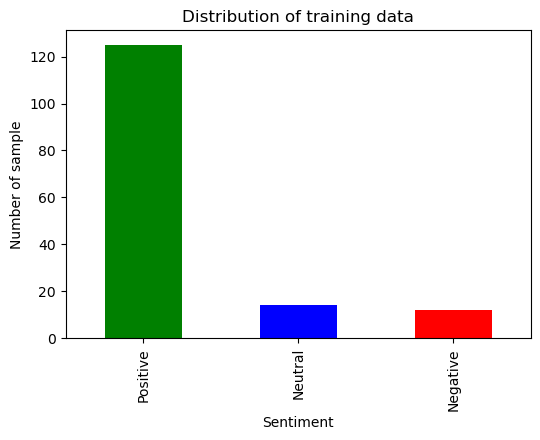

In [146]:
# to plot
import matplotlib.pyplot as plt
counts = y_train.value_counts()
plt.figure(figsize=(6,4))
counts.plot(kind='bar', color=['green','blue','red'])
plt.title('Distribution of training data')
plt.xlabel('Sentiment')
plt.ylabel('Number of sample')
plt.show()

In [ ]:
#The above figure shows there are more positive response compated to that of neutral and negeative